## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy.

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np

In [2]:
# our toy data for this task
x = np.random.uniform(0, 10, size=20)
temp = 1.3*x + 15 + np.random.normal(0, 1, size=20)

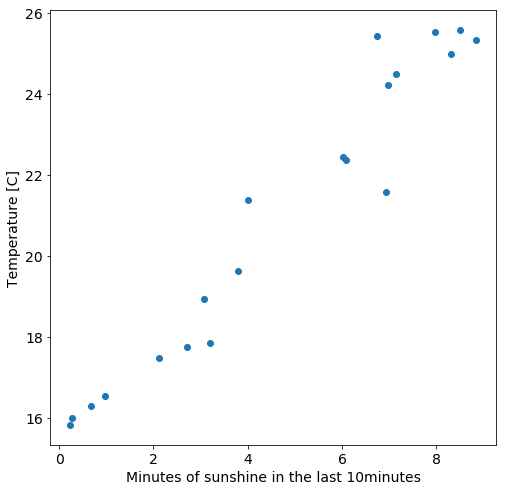

In [3]:
plt.plot(x, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10minutes")
plt.ylabel("Temperature [C]");

In [4]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        y_pred = np.dot(self.W,X) + self.b
        return y_pred
    
    def grad_loss(self, x, y_true):
        # compute gradient with respect to W and b for one sample x and the true value y_true
        grad_b = 0
        grad_W = 0

        # calculating the change for each point
        grad_b += - 2 * (y_true - ((self.W*x) + self.b))
        grad_W += - 2 * x * (y_true - ((self.W * x) + self.b))
        
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        #compute one step of the gradient descent update, update W and b
        grads = self.grad_loss(x, y)
        
        self.W = self.W - (learning_rate * grads['W'])
        self.b = self.b - (learning_rate * grads['b'])
        
    def loss(self, x, y):
        y_pred = self.predict(x)
        loss = (y - y_pred)**2
        
        return loss

    def accuracy(self, X, y):          
        acc = self.loss(X, y)    
        ols = np.sum(acc)/len(X)

        return ols

* how do you know that you trained for enough epochs?
* visualise how the loss changes over the epochs
* are more epochs always better? How could you show this?
* change the setup to use stochastic gradient descent
* (bonus) visualise the values of W and b over the epochs
* (bonus) can you see a difference for the paths of W and b between SGD and normal GD?

In [5]:
lr = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

initial value of W: 0.0507 and b: 0.4581


In [6]:
# for plotting 
#acc_ = np.empty(300+len(x))
acc_ = [] 

learning_rate = 0.001
for epoch in range(1,300):
    for i, (x_, y_) in enumerate(zip(x, temp)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(x, temp)
        print("Update: train accuracy: %.4f" % (train_acc), end=' ')
        print("value of W: %.4f and b: %.4f" % (lr.W, lr.b))

        acc_.append(lr.accuracy(x, temp))

Update: train accuracy: 398.8330 value of W: 0.1610 and b: 0.4925
Update: train accuracy: 379.1436 value of W: 0.2525 and b: 0.5262
Update: train accuracy: 376.5507 value of W: 0.2597 and b: 0.5567
Update: train accuracy: 348.7306 value of W: 0.3969 and b: 0.5928
Update: train accuracy: 285.6570 value of W: 0.7435 and b: 0.6364
Update: train accuracy: 279.7847 value of W: 0.7728 and b: 0.6668
Update: train accuracy: 245.9869 value of W: 0.9795 and b: 0.7008
Update: train accuracy: 217.2163 value of W: 1.1703 and b: 0.7325
Update: train accuracy: 213.5985 value of W: 1.1901 and b: 0.7620
Update: train accuracy: 184.1776 value of W: 1.4075 and b: 0.7924
Update: train accuracy: 157.8300 value of W: 1.6255 and b: 0.8181
Update: train accuracy: 151.0418 value of W: 1.6817 and b: 0.8445
Update: train accuracy: 133.9055 value of W: 1.8439 and b: 0.8678
Update: train accuracy: 126.1138 value of W: 1.9203 and b: 0.8926
Update: train accuracy: 116.6948 value of W: 2.0225 and b: 0.9074
Update: tr

Update: train accuracy: 38.7898 value of W: 3.0663 and b: 3.4126
Update: train accuracy: 38.7963 value of W: 3.0296 and b: 3.4080
Update: train accuracy: 38.6691 value of W: 3.0493 and b: 3.4284
Update: train accuracy: 38.6691 value of W: 3.0542 and b: 3.4293
Update: train accuracy: 38.6721 value of W: 3.0618 and b: 3.4305
Update: train accuracy: 38.5732 value of W: 3.0763 and b: 3.4521
Update: train accuracy: 38.5528 value of W: 3.0625 and b: 3.4502
Update: train accuracy: 38.6131 value of W: 2.9968 and b: 3.4424
Update: train accuracy: 38.4752 value of W: 3.0294 and b: 3.4578
Update: train accuracy: 38.4807 value of W: 3.0246 and b: 3.4571
Update: train accuracy: 38.4360 value of W: 3.0626 and b: 3.4694
Update: train accuracy: 38.4443 value of W: 3.0191 and b: 3.4632
Update: train accuracy: 38.4105 value of W: 3.0657 and b: 3.4748
Update: train accuracy: 38.2872 value of W: 3.0720 and b: 3.4982
Update: train accuracy: 38.2816 value of W: 3.0051 and b: 3.4901
Update: train accuracy: 3

Update: train accuracy: 22.9190 value of W: 2.6294 and b: 6.2181
Update: train accuracy: 22.9500 value of W: 2.5791 and b: 6.2122
Update: train accuracy: 22.8722 value of W: 2.6037 and b: 6.2237
Update: train accuracy: 22.8738 value of W: 2.6016 and b: 6.2234
Update: train accuracy: 22.8525 value of W: 2.6306 and b: 6.2328
Update: train accuracy: 22.8609 value of W: 2.5904 and b: 6.2270
Update: train accuracy: 22.8318 value of W: 2.6286 and b: 6.2366
Update: train accuracy: 22.7578 value of W: 2.6334 and b: 6.2547
Update: train accuracy: 22.7621 value of W: 2.5812 and b: 6.2484
Update: train accuracy: 22.7355 value of W: 2.6050 and b: 6.2519
Update: train accuracy: 22.9044 value of W: 2.5349 and b: 6.2440
Update: train accuracy: 22.7935 value of W: 2.5572 and b: 6.2509
Update: train accuracy: 22.7026 value of W: 2.5820 and b: 6.2601
Update: train accuracy: 22.6100 value of W: 2.5862 and b: 6.2780
Update: train accuracy: 22.5842 value of W: 2.6131 and b: 6.2851
Update: train accuracy: 2

Update: train accuracy: 13.3457 value of W: 2.2462 and b: 8.4438
Update: train accuracy: 13.2912 value of W: 2.2494 and b: 8.4576
Update: train accuracy: 13.2733 value of W: 2.2694 and b: 8.4628
Update: train accuracy: 13.2774 value of W: 2.2533 and b: 8.4608
Update: train accuracy: 13.2352 value of W: 2.2647 and b: 8.4727
Update: train accuracy: 13.2351 value of W: 2.2663 and b: 8.4729
Update: train accuracy: 13.2357 value of W: 2.2703 and b: 8.4736
Update: train accuracy: 13.2017 value of W: 2.2788 and b: 8.4862
Update: train accuracy: 13.1980 value of W: 2.2745 and b: 8.4856
Update: train accuracy: 13.2120 value of W: 2.2369 and b: 8.4811
Update: train accuracy: 13.1707 value of W: 2.2549 and b: 8.4896
Update: train accuracy: 13.1706 value of W: 2.2551 and b: 8.4896
Update: train accuracy: 13.1626 value of W: 2.2767 and b: 8.4967
Update: train accuracy: 13.1710 value of W: 2.2391 and b: 8.4912
Update: train accuracy: 13.1462 value of W: 2.2705 and b: 8.4991
Update: train accuracy: 1

Update: train accuracy: 7.1564 value of W: 1.9750 and b: 10.3994
Update: train accuracy: 7.1608 value of W: 1.9480 and b: 10.3962
Update: train accuracy: 7.1415 value of W: 1.9606 and b: 10.4021
Update: train accuracy: 7.1411 value of W: 1.9627 and b: 10.4024
Update: train accuracy: 7.1401 value of W: 1.9781 and b: 10.4074
Update: train accuracy: 7.1484 value of W: 1.9427 and b: 10.4023
Update: train accuracy: 7.1276 value of W: 1.9683 and b: 10.4087
Update: train accuracy: 7.1043 value of W: 1.9710 and b: 10.4188
Update: train accuracy: 7.1143 value of W: 1.9409 and b: 10.4152
Update: train accuracy: 7.1004 value of W: 1.9667 and b: 10.4190
Update: train accuracy: 7.1452 value of W: 1.9227 and b: 10.4140
Update: train accuracy: 7.1230 value of W: 1.9309 and b: 10.4166
Update: train accuracy: 7.0978 value of W: 1.9422 and b: 10.4208
Update: train accuracy: 7.0691 value of W: 1.9446 and b: 10.4307
Update: train accuracy: 7.0575 value of W: 1.9584 and b: 10.4343
Update: train accuracy: 7

Update: train accuracy: 3.7469 value of W: 1.7078 and b: 11.9323
Update: train accuracy: 3.7382 value of W: 1.7343 and b: 11.9363
Update: train accuracy: 3.7558 value of W: 1.6998 and b: 11.9324
Update: train accuracy: 3.7502 value of W: 1.7028 and b: 11.9333
Update: train accuracy: 3.7392 value of W: 1.7093 and b: 11.9357
Update: train accuracy: 3.7247 value of W: 1.7109 and b: 11.9427
Update: train accuracy: 3.7175 value of W: 1.7200 and b: 11.9450
Update: train accuracy: 3.7181 value of W: 1.7181 and b: 11.9448
Update: train accuracy: 3.7079 value of W: 1.7238 and b: 11.9507
Update: train accuracy: 3.7079 value of W: 1.7231 and b: 11.9506
Update: train accuracy: 3.7079 value of W: 1.7246 and b: 11.9508
Update: train accuracy: 3.6989 value of W: 1.7288 and b: 11.9572
Update: train accuracy: 3.7000 value of W: 1.7311 and b: 11.9575
Update: train accuracy: 3.7000 value of W: 1.7129 and b: 11.9554
Update: train accuracy: 3.6924 value of W: 1.7209 and b: 11.9591
Update: train accuracy: 3

Update: train accuracy: 2.1601 value of W: 1.5659 and b: 12.9655
Update: train accuracy: 2.1602 value of W: 1.5645 and b: 12.9653
Update: train accuracy: 2.1601 value of W: 1.5653 and b: 12.9654
Update: train accuracy: 2.1554 value of W: 1.5684 and b: 12.9700
Update: train accuracy: 2.1569 value of W: 1.5726 and b: 12.9706
Update: train accuracy: 2.1555 value of W: 1.5600 and b: 12.9691
Update: train accuracy: 2.1527 value of W: 1.5651 and b: 12.9715
Update: train accuracy: 2.1535 value of W: 1.5697 and b: 12.9722
Update: train accuracy: 2.1559 value of W: 1.5768 and b: 12.9744
Update: train accuracy: 2.1641 value of W: 1.5444 and b: 12.9698
Update: train accuracy: 2.1490 value of W: 1.5622 and b: 12.9742
Update: train accuracy: 2.1428 value of W: 1.5636 and b: 12.9794
Update: train accuracy: 2.1507 value of W: 1.5472 and b: 12.9774
Update: train accuracy: 2.1459 value of W: 1.5742 and b: 12.9814
Update: train accuracy: 2.1504 value of W: 1.5463 and b: 12.9783
Update: train accuracy: 2

Update: train accuracy: 1.3818 value of W: 1.4507 and b: 13.7062
Update: train accuracy: 1.3819 value of W: 1.4488 and b: 13.7059
Update: train accuracy: 1.3819 value of W: 1.4491 and b: 13.7060
Update: train accuracy: 1.3795 value of W: 1.4512 and b: 13.7092
Update: train accuracy: 1.3809 value of W: 1.4569 and b: 13.7100
Update: train accuracy: 1.3793 value of W: 1.4484 and b: 13.7090
Update: train accuracy: 1.3785 value of W: 1.4514 and b: 13.7104
Update: train accuracy: 1.3800 value of W: 1.4568 and b: 13.7111
Update: train accuracy: 1.3821 value of W: 1.4614 and b: 13.7126
Update: train accuracy: 1.3903 value of W: 1.4299 and b: 13.7081
Update: train accuracy: 1.3769 value of W: 1.4454 and b: 13.7120
Update: train accuracy: 1.3736 value of W: 1.4465 and b: 13.7158
Update: train accuracy: 1.3802 value of W: 1.4340 and b: 13.7143
Update: train accuracy: 1.3780 value of W: 1.4613 and b: 13.7183
Update: train accuracy: 1.3761 value of W: 1.4380 and b: 13.7157
Update: train accuracy: 1

Update: train accuracy: 1.0399 value of W: 1.3714 and b: 14.1799
Update: train accuracy: 1.0379 value of W: 1.3722 and b: 14.1828
Update: train accuracy: 1.0435 value of W: 1.3621 and b: 14.1816
Update: train accuracy: 1.0432 value of W: 1.3897 and b: 14.1857
Update: train accuracy: 1.0383 value of W: 1.3694 and b: 14.1834
Update: train accuracy: 1.0415 value of W: 1.3647 and b: 14.1819
Update: train accuracy: 1.0422 value of W: 1.3640 and b: 14.1816
Update: train accuracy: 1.0399 value of W: 1.3646 and b: 14.1843
Update: train accuracy: 1.0384 value of W: 1.3666 and b: 14.1848
Update: train accuracy: 1.0360 value of W: 1.3738 and b: 14.1857
Update: train accuracy: 1.0348 value of W: 1.3758 and b: 14.1878
Update: train accuracy: 1.0350 value of W: 1.3736 and b: 14.1875
Update: train accuracy: 1.0350 value of W: 1.3735 and b: 14.1874
Update: train accuracy: 1.0336 value of W: 1.3751 and b: 14.1898
Update: train accuracy: 1.0350 value of W: 1.3816 and b: 14.1907
Update: train accuracy: 1

Update: train accuracy: 0.8684 value of W: 1.3198 and b: 14.5207
Update: train accuracy: 0.8714 value of W: 1.3140 and b: 14.5189
Update: train accuracy: 0.8728 value of W: 1.3122 and b: 14.5183
Update: train accuracy: 0.8715 value of W: 1.3127 and b: 14.5203
Update: train accuracy: 0.8708 value of W: 1.3136 and b: 14.5205
Update: train accuracy: 0.8678 value of W: 1.3222 and b: 14.5216
Update: train accuracy: 0.8673 value of W: 1.3237 and b: 14.5231
Update: train accuracy: 0.8674 value of W: 1.3213 and b: 14.5227
Update: train accuracy: 0.8675 value of W: 1.3209 and b: 14.5227
Update: train accuracy: 0.8667 value of W: 1.3221 and b: 14.5244
Update: train accuracy: 0.8679 value of W: 1.3293 and b: 14.5254
Update: train accuracy: 0.8668 value of W: 1.3253 and b: 14.5250
Update: train accuracy: 0.8668 value of W: 1.3259 and b: 14.5252
Update: train accuracy: 0.8692 value of W: 1.3321 and b: 14.5261
Update: train accuracy: 0.8704 value of W: 1.3341 and b: 14.5268
Update: train accuracy: 0

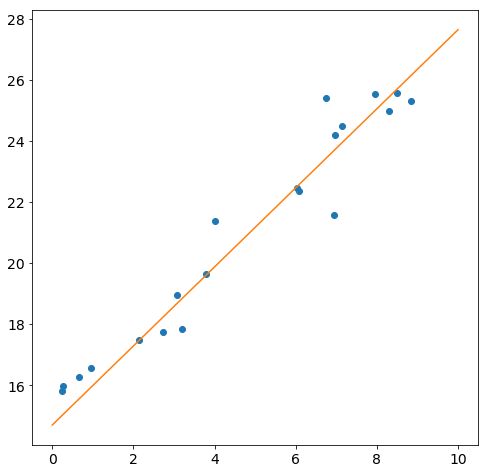

In [7]:
line = np.linspace(0, 10, 100)
plt.plot(x, temp, 'o')
plt.plot(line, lr.predict(line));

In [8]:
len(x)*299

5980

In [9]:
epoch = [y for y in range (0,len(x)*299)]

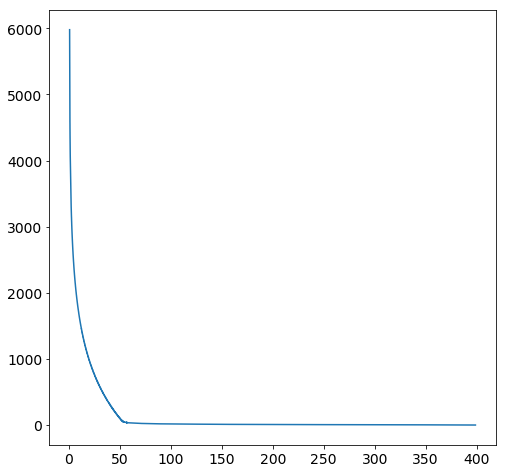

In [11]:
plt.plot(acc_, epoch)

None